# E-COMMERCE
## `Analysis`

### 📦 LIBRAIRIES
---

In [2]:
# --- OPERATING SYSTEM ---------------------------------------------------------
import os


# --- DATA --------------------------------------------------------------------
# --- Pandas
import pandas as pd
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 500)

# --- Numpy
import numpy as np



# --- PLOTS -------------------------------------------------------------------
# --- Pyplot
import matplotlib.pyplot as plt

# --- Seaborn
import seaborn as sns
sns.set_theme(style="white")

# --- Plotly
# import plotly.express as px
# import plotly.graph_objects as go
# import plotly.io as pio
# pio.renderers.default = "vscode"
# from plotly.subplots import make_subplots

### 📥 IMPORT
---

In [3]:
encoding_norm = "UTF-8"
separator = ","

cols_dates_to_parse_1 = ['order_created_at', 'order_shipped_at', 'order_delivered_at', 'order_returned_at']
cols_dates_to_parse_2 = ['event_created_at']

file_name_1= "../02_Data_output/Orders.csv"
file_name_2= "../02_Data_output/Clients.csv"

imp1 = pd.read_csv(file_name_1, sep=separator, low_memory=False, encoding=encoding_norm, parse_dates=cols_dates_to_parse_1)
imp2 = pd.read_csv(file_name_2, sep=separator, low_memory=False, encoding=encoding_norm, parse_dates=cols_dates_to_parse_2)

df = imp1.copy()
df2 = imp2.copy()

In [4]:
df.head()

,item_id,order_id,user_id,product_id,inventory_item_id,order_status,order_created_at,order_shipped_at,order_delivered_at,order_returned_at,order_sale_price,order_preparation_time,order_delivery_time,product_cost,product_category,product_name,product_brand,product_retail_price,product_department,distribution_center_id,distribution_center_name,inventory_cost,user_age,user_gender,user_state,user_city,user_country,profit,user_market
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaT,NaT,NaT,0.02,0,0,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,1,Memphis TN,0.0083,29,F,Hebei,Jinhua,China,0.0117,Asia
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaT,0.02,43,93,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,1,Memphis TN,0.0083,35,F,Jiangsu,Yulin,China,0.0117,Asia
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaT,0.02,12,117,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,1,Memphis TN,0.0083,49,F,Texas,Longview,United States,0.0117,North America
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaT,NaT,0.02,44,0,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,1,Memphis TN,0.0083,44,F,Hyogo,Kakogawa City,Japan,0.0117,Asia
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaT,NaT,0.02,3,0,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,1,Memphis TN,0.0083,59,F,England,Lancaster,United Kingdom,0.0117,Europe


In [5]:
df2.head()

,user_id,user_age,user_gender,user_state,user_city,user_country,event_created_at,event_browser,event_traffic_source,event_uri,event_type
0,457,65,M,Acre,Rio Branco,Brasil,2023-10-08,Chrome,Email,/product/19914,product
1,457,65,M,Acre,Rio Branco,Brasil,2023-10-08,Chrome,Email,/purchase,purchase
2,457,65,M,Acre,Rio Branco,Brasil,2023-10-08,Chrome,Email,/cart,cart
3,457,65,M,Acre,Rio Branco,Brasil,2023-10-08,Chrome,Email,/home,home
4,457,65,M,Acre,Rio Branco,Brasil,2023-10-08,Chrome,Email,/department/men/category/suits&sportcoats/bran...,department


### 🔍 EDA
---

#### ◻  Analyse des ventes

##### 🔹 Total des Ventes par Année

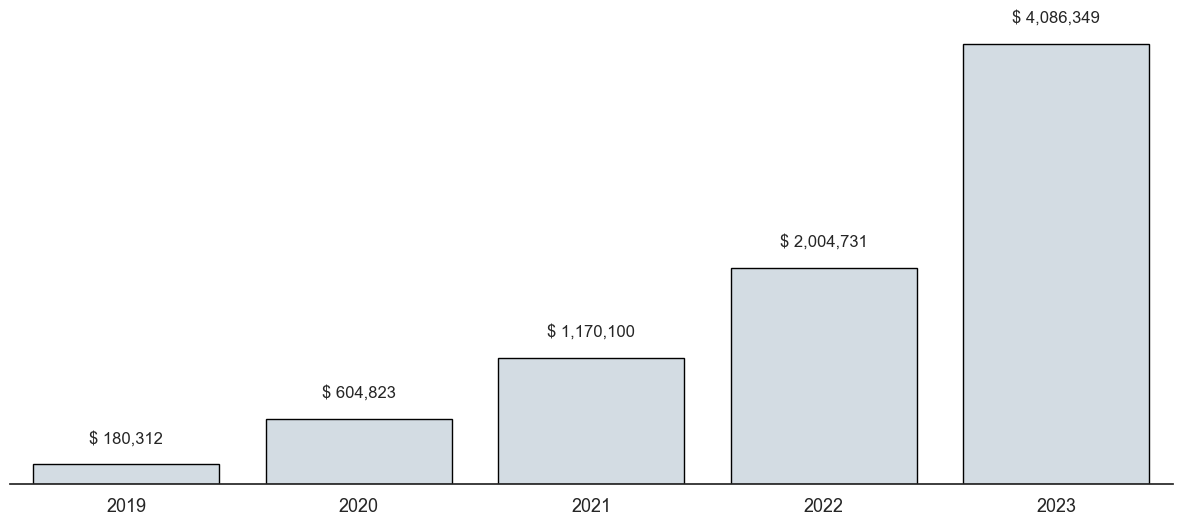

In [6]:
# --- Columns
df['order_created_at'] = pd.to_datetime(df['order_created_at']).dt.tz_localize(None)
df['order_year'] = df['order_created_at'].dt.to_period('Y')


# --- Data
data = df.groupby('order_year')['order_sale_price'].sum().reset_index()
data = data.head(5)

# --- Bars Aesthetics
maxi_index = data['order_sale_price'].idxmax()
palette = ['#29333b' if i != maxi_index + 1 else '#d0dce6' for i in range(len(data))]
palette = ['#d0dce6' if i != maxi_index + 1 else '#d0dce6' for i in range(len(data))]
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize=(15, 6))

ax = sns.barplot(x= 'order_year',
                 y= 'order_sale_price',
                 data= data,
                 palette= palette,
                 hue= 'order_sale_price',
                 edgecolor= edgecolor,
                 legend= False
                )


# --- Chart Aesthetics
sns.despine()

# ax.spines['bottom'].set_color(None)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.set_ticks([])

ax.spines['left'].set_color(None)
ax.get_yaxis().set_visible(False)
ax.yaxis.set_ticks([])

ax.xaxis.set_tick_params(labelsize = 13)


# --- Chart Labels
plt.xlabel(None)
plt.ylabel('Ventes ($)')
# plt.title('Total des Ventes ($) par Année', fontsize=16, pad=20)


# # --- Bars Labels
space= 200000
for i, v in enumerate(data['order_sale_price']):
    plt.text(i, v + space, f"$ {v:,.0f}", ha='center')


# --- Display
plt.show()

##### 🔹 Total des Ventes par Mois

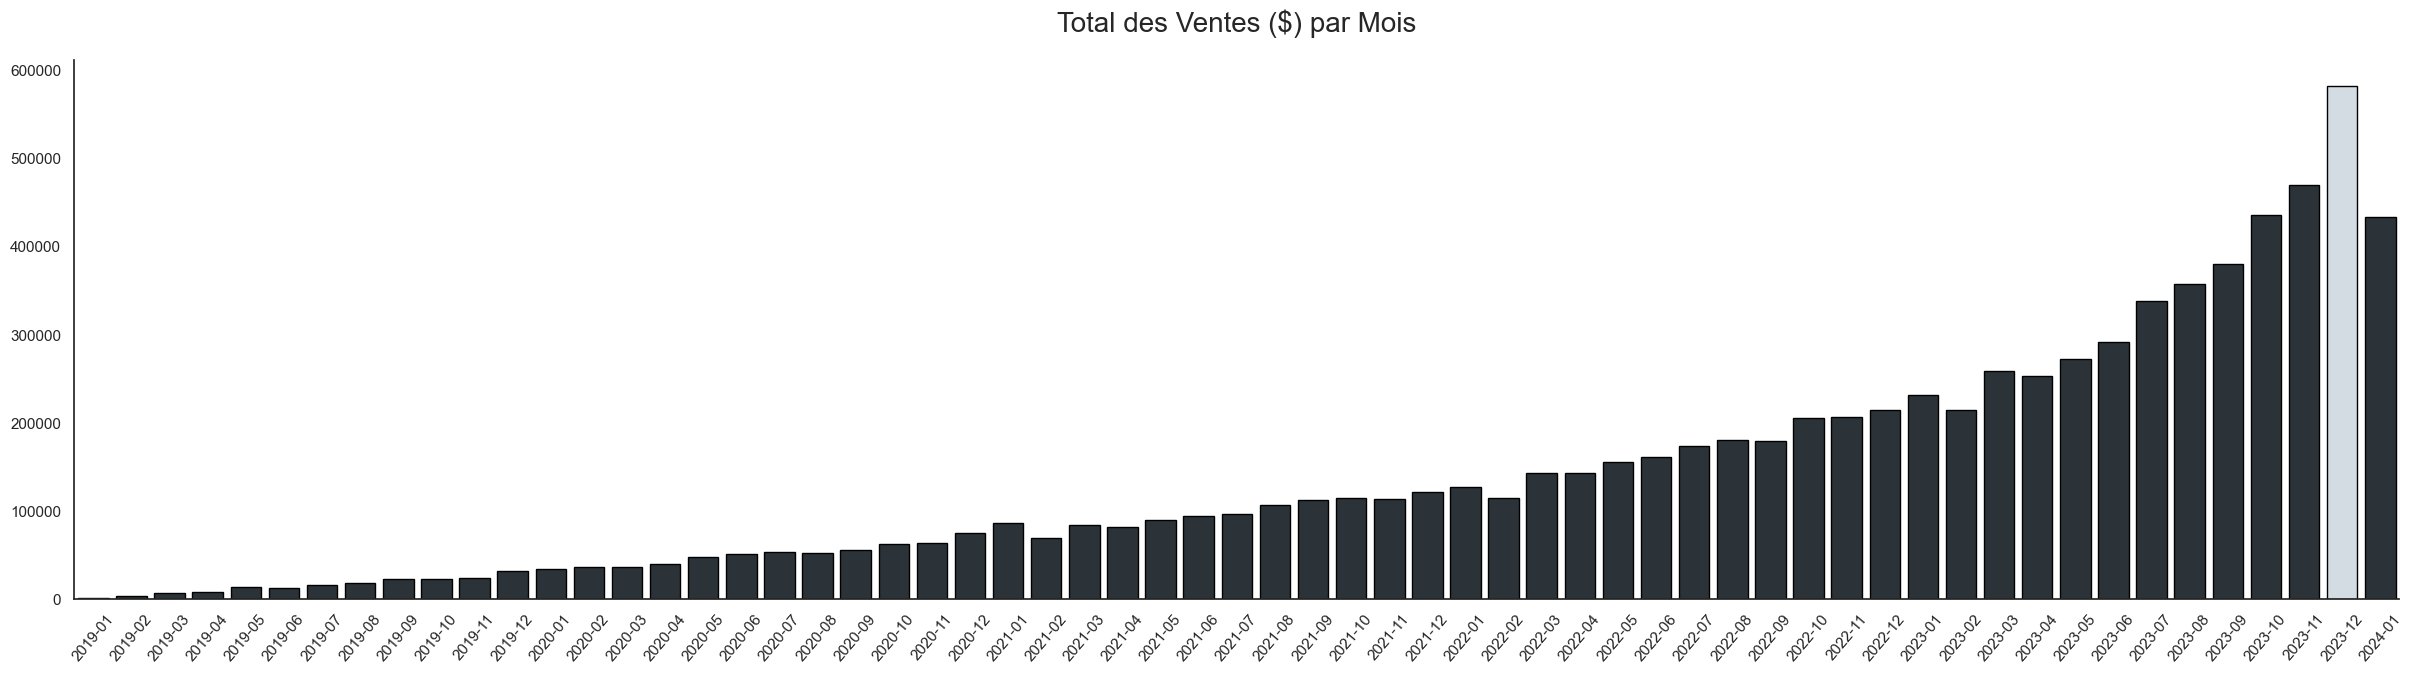

In [7]:
# --- Columns
df['order_created_at'] = pd.to_datetime(df['order_created_at']).dt.tz_localize(None)
df['order_month'] = df['order_created_at'].dt.to_period('M')


# --- Data
data = df.groupby('order_month')['order_sale_price'].sum().reset_index()


# --- Bars Aesthetics
maxi_index = data['order_sale_price'].idxmax()
palette = ['#29333b' if i != maxi_index + 1 else '#d0dce6' for i in range(len(data))]
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize=(30, 7))

sns.barplot(x='order_month',
            y='order_sale_price',
            data= data,
            palette= palette,
            hue= 'order_sale_price',
            edgecolor= edgecolor,
            legend= False
           )


# --- Chart Aesthetics
sns.despine()

# ax.spines['bottom'].set_color(None)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.set_ticks([])

# ax.spines['left'].set_color(None)
# ax.get_yaxis().set_visible(False)
# ax.yaxis.set_ticks([])


# --- Chart Labels
plt.xlabel(None)
plt.ylabel(None)
plt.title('Total des Ventes ($) par Mois', fontsize=20, pad=20)
plt.xticks(rotation= 50)


# --- Display
plt.show()

#### ◻ Analyse des marchés

##### 🔹 Total des Ventes ($) par Pays

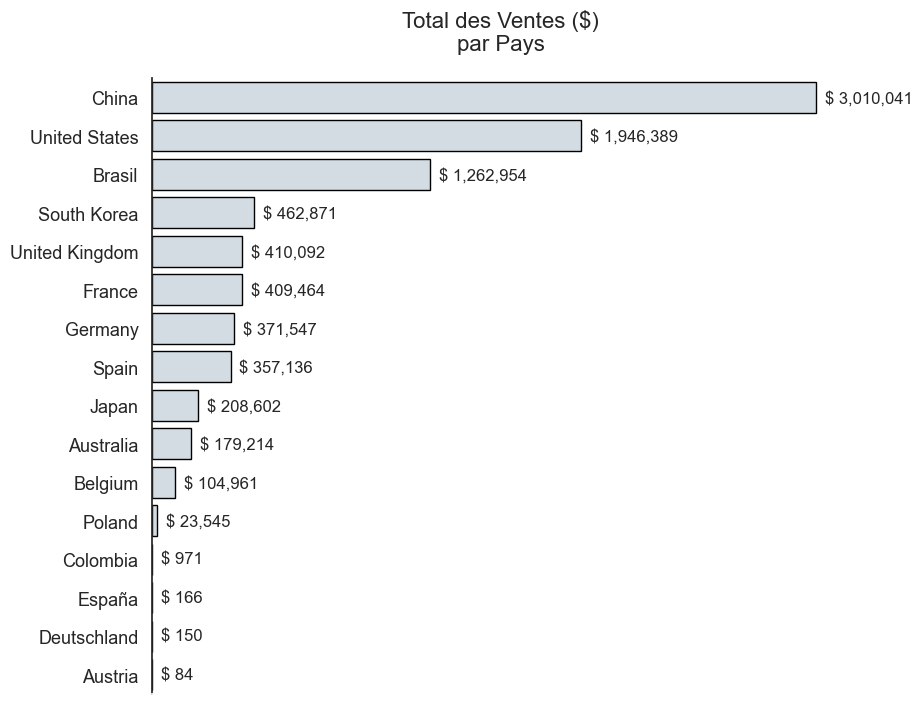

Total des ventes : $ 8,748,186


In [8]:
# Data
data = df.groupby('user_country')['order_sale_price'].sum().reset_index()
data = data.sort_values(by= 'order_sale_price', ascending= False)


# # --- Bars Aesthetics
data = data.reset_index()
index = data['order_sale_price'].idxmax()
palette = ['#29333b' if i != index else '#d0dce6' for i in range(len(data))]
palette.reverse()
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize=(9, 8))

ax = sns.barplot(x='order_sale_price',
                 y= 'user_country',
                 data= data,
                #  palette= palette,
                #  hue= 'order_sale_price',
                 color = '#d0dce6',
                 edgecolor= edgecolor,
                 orient= 'h',
                 legend= False
                )


# --- Chart Aesthetics
sns.despine()

ax.spines['bottom'].set_color(None)
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks([])

# ax.spines['left'].set_color(None)
# ax.get_yaxis().set_visible(False)
# ax.yaxis.set_ticks([])

ax.yaxis.set_tick_params(labelsize = 13)


plt.xlabel('Ventes ($)')
plt.ylabel(None)
plt.title('Total des Ventes ($)\npar Pays', fontsize=16, pad=20)


# --- Bars Labels
space= 40000
for i, v in enumerate(data['order_sale_price']):
    plt.text(v + space, i, f"$ {v:,.0f}", va='center')


# --- Display
plt.show()


# --- total_orders
total_orders = round(data['order_sale_price'].sum(), 0)
print(f'Total des ventes : $ {total_orders:,.0f}')

##### 🔹 Total des Profits ($) par Pays

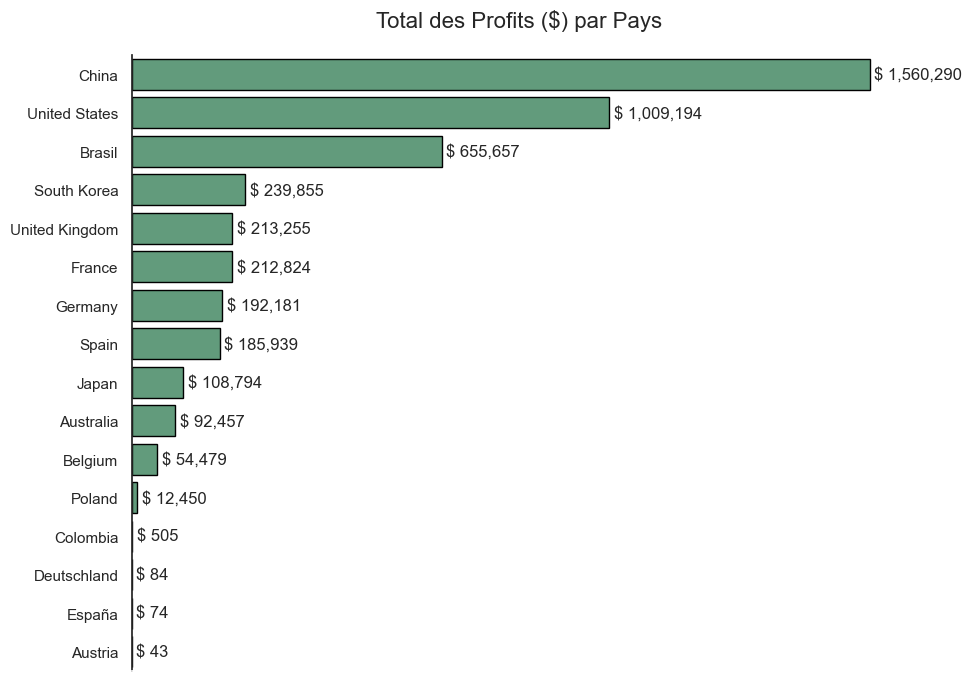

Total des profits : $ 4,538,080


In [9]:
# Data
data = df.groupby('user_country')['profit'].sum().reset_index()
data = data.sort_values(by= 'profit', ascending= False)


# --- Bars Aesthetics
color = ['#59a47b']
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize=(10, 8))

ax = sns.barplot(x='profit',
                 y= 'user_country',
                 data= data,
                 color= color[0],
                 edgecolor= edgecolor,
                 orient= 'h',
                 legend= False
                )


# --- Chart Aesthetics
sns.despine()

ax.spines['bottom'].set_color(None)
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks([])

# ax.spines['left'].set_color(None)
# ax.get_yaxis().set_visible(False)
# ax.yaxis.set_ticks([])


plt.xlabel('Profit ($)')
plt.ylabel(None)
plt.title('Total des Profits ($) par Pays', fontsize=16, pad=20)


# --- Bars Labels
space= 10000
for i, v in enumerate(data['profit']):
    plt.text(v + space, i, f"$ {v:,.0f}", va='center')


# --- Display
plt.show()


# --- total_profit
total_profit = round(data['profit'].sum(), 0)
print(f'Total des profits : $ {total_profit:,.0f}')

##### 🔹 Part des Ventes (%) par Continent

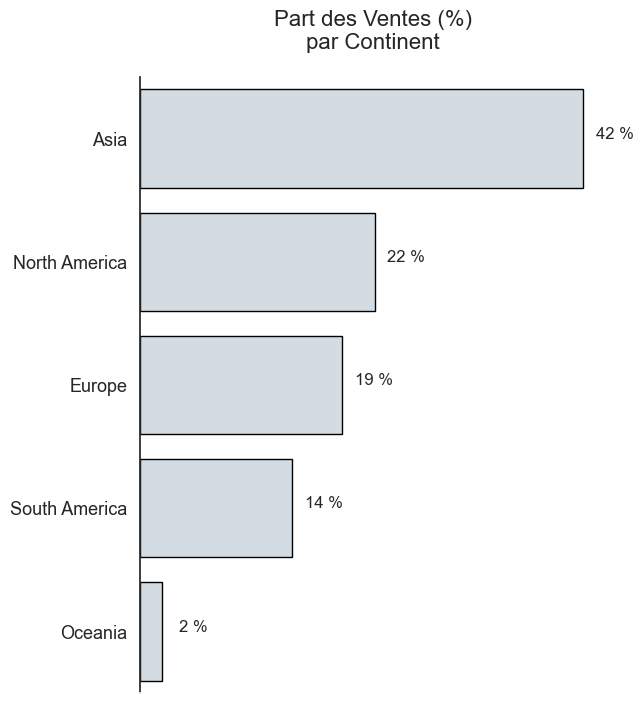

In [10]:
# Data
data = df.groupby('user_market')['order_sale_price'].sum().reset_index()
data = data.sort_values(by= 'order_sale_price', ascending= False)

total_sale_price = data['order_sale_price'].sum()
data['percentage'] = data['order_sale_price'] / total_sale_price * 100

# --- Bars Aesthetics
data = data.reset_index(drop= True)
index = data['percentage'].idxmin()
# palette = sns.color_palette('Greens', n_colors= len(data.index))
palette = ['#29333b' if i != index  else '#d0dce6' for i in range(len(data))]
# palette.reverse()
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize=(6, 8))

ax = sns.barplot(y='user_market',
                 x= 'percentage',
                 data= data,
                #  palette= palette,
                #  hue= 'order_sale_price',
                 color = '#d0dce6',
                 edgecolor= edgecolor,
                 orient= 'h',
                 legend= False
                )


# --- Chart Aesthetics
sns.despine()

ax.spines['bottom'].set_color(None)
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks([])

# ax.spines['left'].set_color(None)
# ax.get_yaxis().set_visible(False)
# ax.yaxis.set_ticks([])

ax.yaxis.set_tick_params(labelsize = 13)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Part des Ventes (%)\npar Continent', fontsize=16, pad=20)


# --- Bars Labels
space= 3
for i, v in enumerate(data['percentage']):
    plt.text(v + space, i, f"{v:.0f} %", ha='center')


# --- Display
plt.show()

#### ◻ Analyse des catégories de produits

##### 🔹 Ventes par catégorie de produit

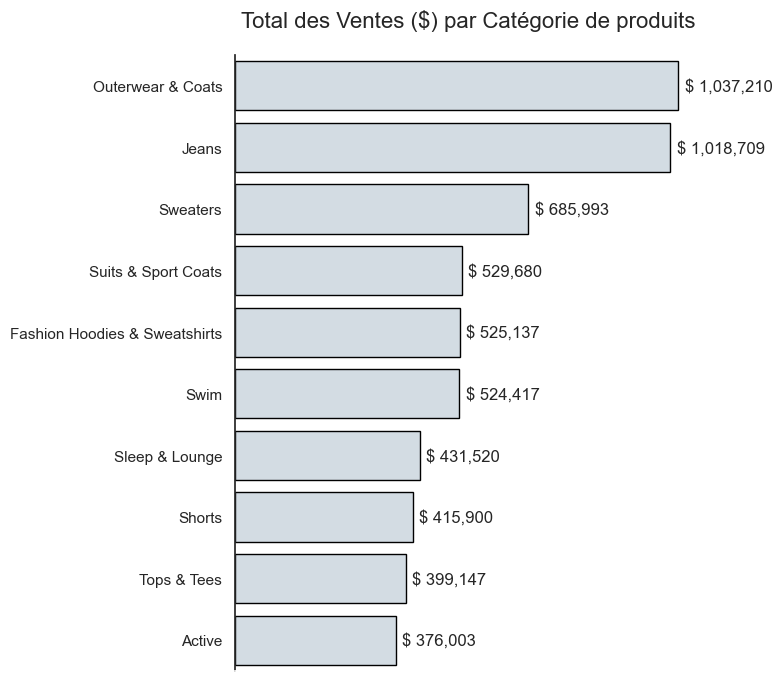

In [11]:
# --- Data
data = df.groupby('product_category')['order_sale_price'].sum().reset_index()
data = data.sort_values(by= 'order_sale_price', ascending= False)

data = data.head(10)

# # --- Bars Aesthetics
color = ['#d0dce6']
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize=(6, 8))

ax = sns.barplot(x= 'order_sale_price',
                 y= 'product_category',
                 data= data,
                 color = color[0],
                 edgecolor= edgecolor
                 )

# --- Chart Aesthetics
sns.despine()

ax.spines['bottom'].set_color(None)
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks([])

# ax.spines['left'].set_color(None)
# ax.get_yaxis().set_visible(False)
# ax.yaxis.set_ticks([])


# --- Chart Labels
plt.xlabel('Ventes ($)')
plt.ylabel(None)
plt.title('Total des Ventes ($) par Catégorie de produits', fontsize=16, pad=20)

# --- Bars Labels
space = 15000
for i, v in enumerate(data['order_sale_price']):
    # plt.text(v + 10, i, str(v), va='center')
    plt.text(v + space, i, f"$ {v:,.0f}", va='center')

# --- Display
plt.show()


##### 🔹 Profit par catégorie de produit

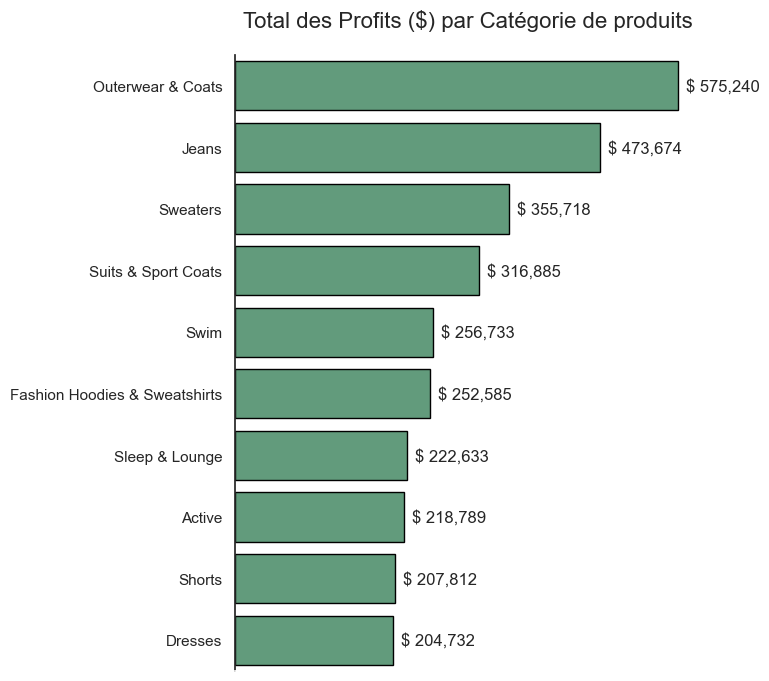

In [12]:
# --- Data
data = df.groupby('product_category')['profit'].sum().reset_index()
data = data.sort_values(by= 'profit', ascending= False)
data = data.head(10)

# --- Bars Aesthetics
color = ['#59a47b']
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize=(6, 8))

ax = sns.barplot(x= 'profit',
                 y= 'product_category',
                 data= data,
                 color= color[0],
                 edgecolor= edgecolor
                 )

# --- Chart Aesthetics
sns.despine()

ax.spines['bottom'].set_color(None)
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks([])

# ax.spines['left'].set_color(None)
# ax.get_yaxis().set_visible(False)
# ax.yaxis.set_ticks([])


# --- Chart Labels
plt.xlabel('Profit ($)')
plt.ylabel(None)
plt.title('Total des Profits ($) par Catégorie de produits', fontsize=16, pad=20)

# --- Bars Labels
space = 10000
for i, v in enumerate(data['profit']):
    # plt.text(v + 10, i, str(v), va='center')
    plt.text(v + space, i, f"$ {v:,.0f}", va='center')

# --- Display
plt.show()


##### 🔹 Coût des produits par Catégorie de produits

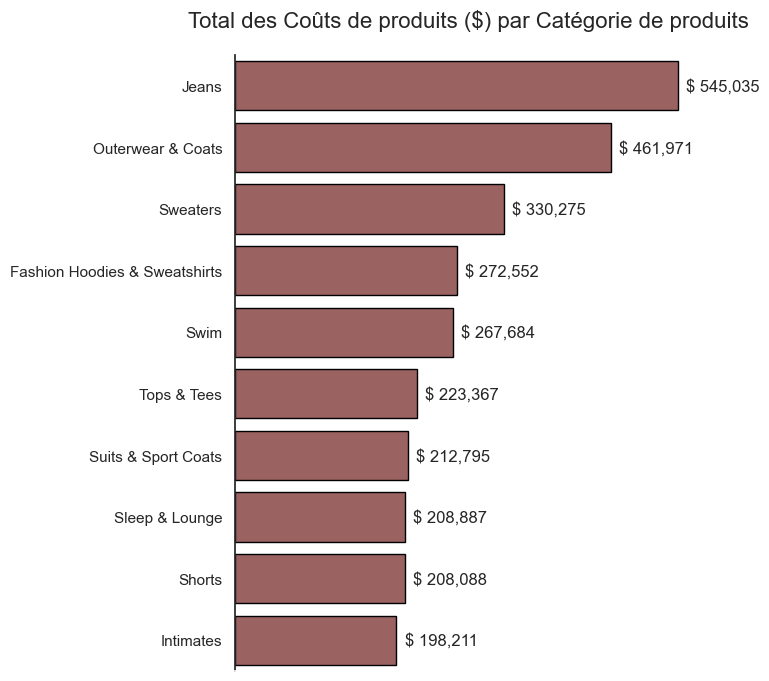

In [24]:
# --- Data
data = df.groupby('product_category')['product_cost'].sum().reset_index()
data = data.sort_values(by= 'product_cost', ascending= False)
data = data.head(10)

# --- Bars Aesthetics
color = ['#a45959']
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize=(6, 8))

ax = sns.barplot(x= 'product_cost',
                 y= 'product_category',
                 data= data,
                 color= color[0],
                 edgecolor= edgecolor
                 )

# --- Chart Aesthetics
sns.despine()

ax.spines['bottom'].set_color(None)
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks([])

# ax.spines['left'].set_color(None)
# ax.get_yaxis().set_visible(False)
# ax.yaxis.set_ticks([])


# --- Chart Labels
plt.xlabel('Coût ($)')
plt.ylabel(None)
plt.title('Total des Coûts de produits ($) par Catégorie de produits', fontsize=16, pad=20)


# --- Bars Labels
space = 10000
for i, v in enumerate(data['product_cost']):
    # plt.text(v + 10, i, str(v), va='center')
    plt.text(v + space, i, f"$ {v:,.0f}", va='center')


# --- Display
plt.show()

#### ◻ Analyse des retours et annulations

##### 🔹 Annulations ($) par catégorie de produit

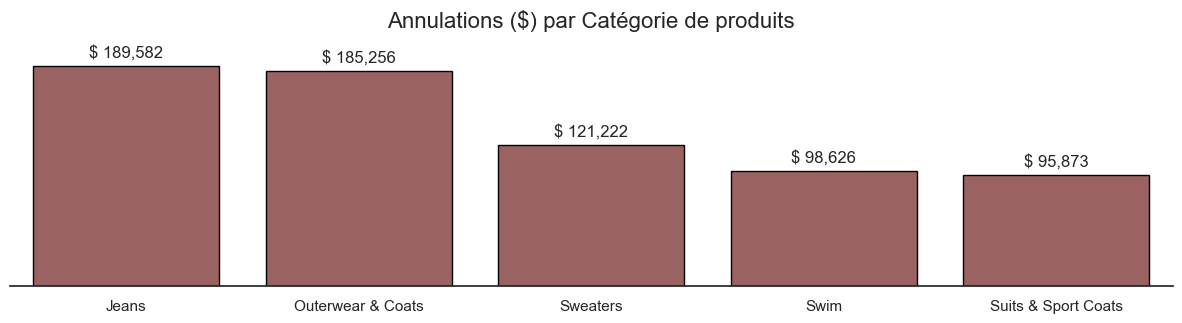

Total d'annulations de commandes : $ 1,602,475
Part des annulations de commandes : 18.3 %


In [14]:
# --- Data
df_cancellations = df[df['order_status'] == 'Cancelled']
data = df_cancellations.groupby('product_category')['order_sale_price'].sum().reset_index()
data = data.sort_values(by='order_sale_price', ascending=False)


# --- Bars Aesthetics
color = ['#a45959']
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize= (15, 3))

ax= sns.barplot(x= 'product_category',
                y= 'order_sale_price',
                data= data.head(),
                color = color[0],
                edgecolor= edgecolor
               )


# --- Chart Aesthetics
sns.despine()

# ax.spines['bottom'].set_color(None)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.set_ticks([])

ax.spines['left'].set_color(None)
ax.get_yaxis().set_visible(False)
ax.yaxis.set_ticks([])

ax.yaxis.set_tick_params(labelsize = 13)


# --- Chart Labels
# plt.xlabel('Catégorie de produit')
plt.xlabel(None)
plt.ylabel('Total ($) d\'annulations')
plt.ylabel(None)
plt.title('Annulations ($) par Catégorie de produits', fontsize=16, pad=20)


# --- Bars Labels
space= 8000
for i, v in enumerate(data['order_sale_price'].head()):
    plt.text(i, v + space, f"$ {v:,.0f}", ha='center')


# --- Display
plt.show()


# --- cancelled_orders_total
cancelled_orders_total = round(data['order_sale_price'].sum(), 0)
print(f'Total d\'annulations de commandes : $ {cancelled_orders_total:,.0f}')


# --- percentage_cancelled_orders
percentage_cancelled_orders = round(cancelled_orders_total / df['order_sale_price'].sum() * 100, 2)
print(f'Part des annulations de commandes : {percentage_cancelled_orders:.1f} %')

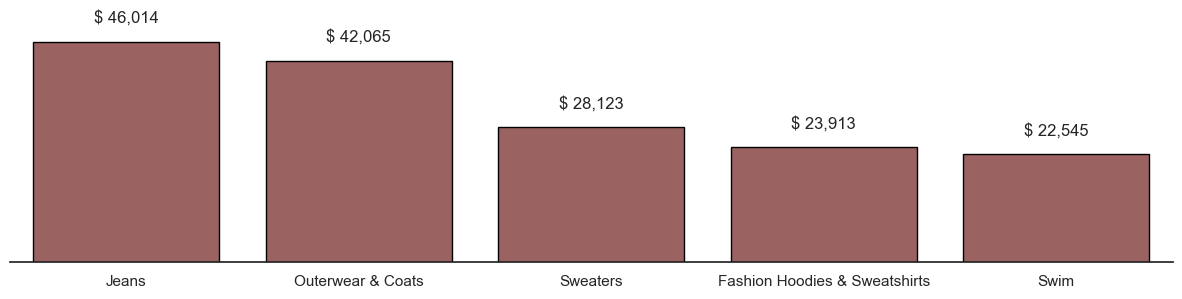

Total d'annulations de commandes : $ 370,988
Part des annulations de commandes : 8.8 %


In [123]:
# --- Data
churn_status = ['Cancelled', 'Returned']
churn_status = ['Returned']
df_cancellations = df[df['order_status'].isin(churn_status)]

# df_cancellations = df[df['order_status'] == 'Cancelled']
data = df_cancellations.groupby('product_category')['product_cost'].sum().reset_index()
data = data.sort_values(by='product_cost', ascending=False)


# --- Bars Aesthetics
color = ['#a45959']
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize= (15, 3))

ax= sns.barplot(x= 'product_category',
                y= 'product_cost',
                data= data.head(),
                color = color[0],
                edgecolor= edgecolor
               )


# --- Chart Aesthetics
sns.despine()

# ax.spines['bottom'].set_color(None)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.set_ticks([])

ax.spines['left'].set_color(None)
ax.get_yaxis().set_visible(False)
ax.yaxis.set_ticks([])

ax.yaxis.set_tick_params(labelsize = 13)


# --- Chart Labels
# plt.xlabel('Catégorie de produit')
plt.xlabel(None)
plt.ylabel('Total ($) d\'annulations')
plt.ylabel(None)
# plt.title('Cost of Annulations ($) par Catégorie de produits', fontsize=16, pad=20)


# --- Bars Labels
space= 4000
for i, v in enumerate(data['product_cost'].head()):
    plt.text(i, v + space, f"$ {v:,.0f}", ha='center')


# --- Display
plt.show()


# --- cancelled_orders_total
cancelled_orders_total = round(data['product_cost'].sum(), 0)
print(f'Total d\'annulations de commandes : $ {cancelled_orders_total:,.0f}')


# --- percentage_cancelled_orders
percentage_cancelled_orders = round(cancelled_orders_total / df['product_cost'].sum() * 100, 2)
print(f'Part des annulations de commandes : {percentage_cancelled_orders:.1f} %')

##### 🔹 Nombre d'annulations par catégorie de produit

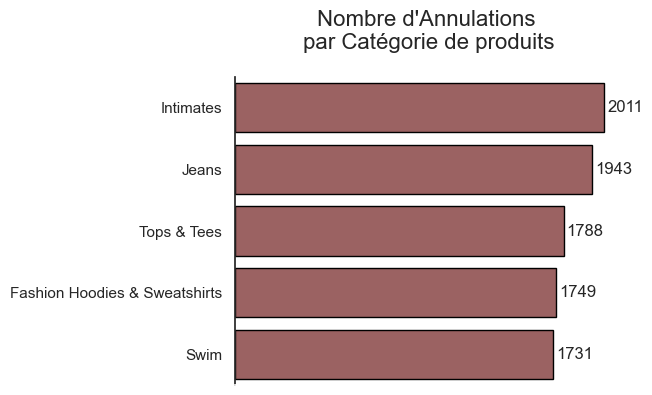

Nombre total d'Annulations : 9222


In [15]:
# --- Data
df_cancellations = df[df['order_status'] == 'Cancelled']
data = df_cancellations.groupby('product_category')['order_id'].count().reset_index()
data = data.sort_values(by='order_id', ascending=False)
data = data.head(5)

# --- Bars Aesthetics
color = ['#a45959']
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize= (5, 4))

ax= sns.barplot(x= 'order_id',
                y= 'product_category',
                data= data,
                color = color[0],
                edgecolor= edgecolor
               )


# --- Chart Aesthetics
sns.despine()

ax.spines['bottom'].set_color(None)
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks([])

# ax.spines['left'].set_color(None)
# ax.get_yaxis().set_visible(False)
# ax.yaxis.set_ticks([])


# --- Chart Labels
plt.xlabel('Nombre d\'annulations')
plt.ylabel('Catégorie de produit')
plt.ylabel(None)
plt.title('Nombre d\'Annulations \npar Catégorie de produits', fontsize=16, pad=20)


# --- Bars Labels
space= 15
for i, v in enumerate(data['order_id']):
    plt.text(v + space, i, str(v), va='center')


# --- Display
plt.show()


# --- total_order_returned
orders_cancelled_number = round(data['order_id'].sum(), 0)
print(f'Nombre total d\'Annulations : {orders_cancelled_number:.0f}')

##### 🔹 Retours ($) par catégorie de produit

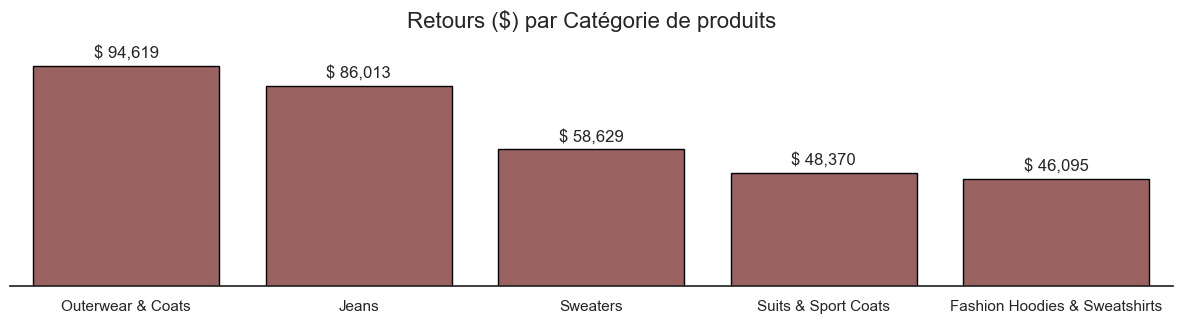

Total de retours de commandes : $ 772,564
Part de retours de commandes : 8.8 %


In [16]:
# --- Data
df_returns = df[df['order_status'] == 'Returned']
data = df_returns.groupby('product_category')['order_sale_price'].sum().reset_index()
data = data.sort_values(by='order_sale_price', ascending=False)


# --- Bars Aesthetics
color = ['#a45959']
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize= (15, 3))

ax= sns.barplot(x= 'product_category',
                y= 'order_sale_price',
                data= data.head(),
                color = color[0],
                edgecolor= edgecolor
               )


# --- Chart Aesthetics
sns.despine()

# ax.spines['bottom'].set_color(None)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.set_ticks([])

ax.spines['left'].set_color(None)
ax.get_yaxis().set_visible(False)
ax.yaxis.set_ticks([])


# --- Chart Labels
# plt.xlabel('Catégorie de produit')
plt.xlabel(None)
plt.ylabel('Nombre de retours')
plt.ylabel(None)
plt.title('Retours ($) par Catégorie de produits', fontsize=16, pad=20)


# --- Bars Labels
space= 4000
for i, v in enumerate(data['order_sale_price'].head()):
    plt.text(i, v + space, f"$ {v:,.0f}", ha='center')


# --- Display
plt.show()


# --- total_order_returned
returned_orders_total = round(data['order_sale_price'].sum(), 0)
print(f'Total de retours de commandes : $ {returned_orders_total:,.0f}')


# --- percentage_returned_orders
percentage_returned_orders = round(returned_orders_total / df['order_sale_price'].sum() * 100, 2)
print(f'Part de retours de commandes : {percentage_returned_orders:.1f} %')

##### 🔹 Nombre de retours par catégorie de produit

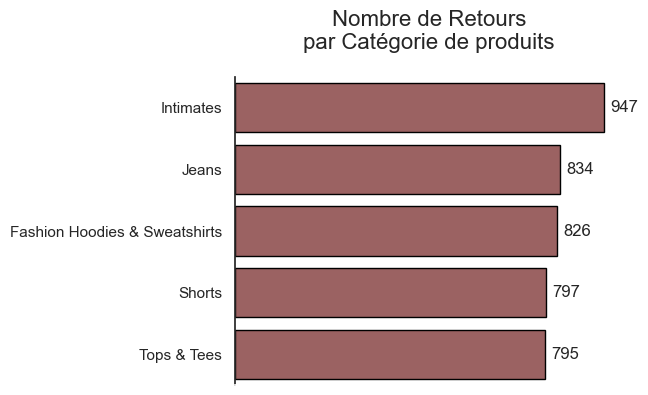

Nombre total de Retours : 4199


In [17]:
# --- Data
data = df.groupby('product_category')['order_returned_at'].count().reset_index()
data = data.sort_values(by='order_returned_at', ascending=False)
data = data.head(5)

# --- Bars Aesthetics
color = ['#a45959']
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize= (5, 4))

ax= sns.barplot(x= 'order_returned_at',
                y= 'product_category',
                data= data,
                color = color[0],
                edgecolor= edgecolor
               )


# --- Chart Aesthetics
sns.despine()

ax.spines['bottom'].set_color(None)
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks([])

# ax.spines['left'].set_color(None)
# ax.get_yaxis().set_visible(False)
# ax.yaxis.set_ticks([])


# --- Chart Labels
plt.xlabel('Nombre de retours')
plt.ylabel('Catégorie de produit')
plt.ylabel(None)
plt.title('Nombre de Retours\npar Catégorie de produits', fontsize=16, pad=20)


# --- Bars Labels
space= 15
for i, v in enumerate(data['order_returned_at']):
    plt.text(v + space, i, str(v), va='center')


# --- Display
plt.show()


# --- total_order_returned
orders_returned_number = round(data['order_returned_at'].sum(), 0)
print(f'Nombre total de Retours : {orders_returned_number:.0f}')

##### 🔹 Coût total des produits par catégorie\navec part des annulations et retours

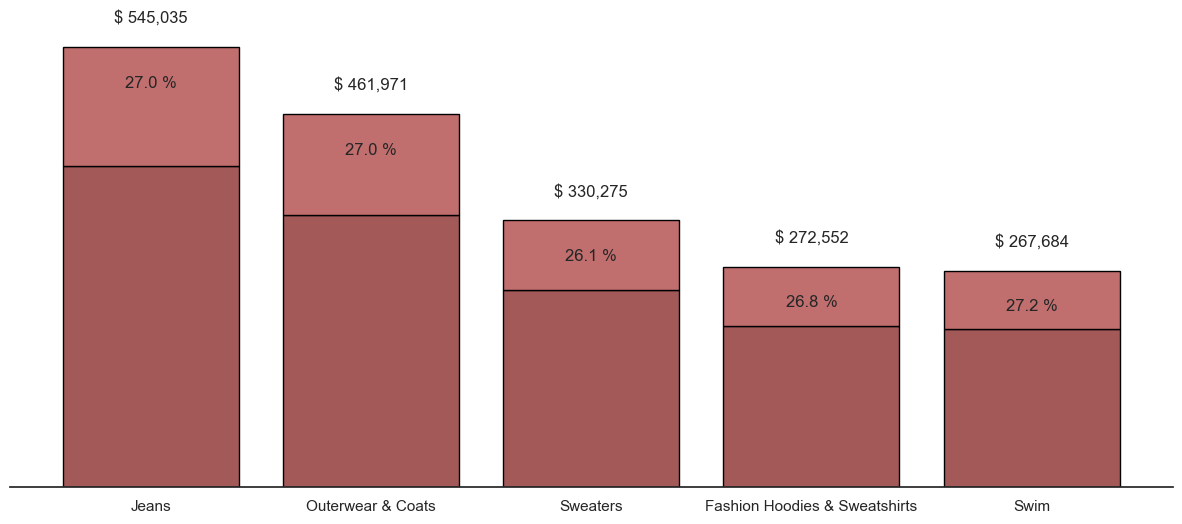

In [180]:
# --- Data
churn_status = ['Cancelled', 'Returned']
df_churn = df[df['order_status'].isin(churn_status)]
df_non_churn = df[~df['order_status'].isin(churn_status)]


# --- Cost Calculation
df_churn_per_category = df_churn.groupby('product_category')['product_cost'].sum().reset_index()
df_non_churn_per_category = df_non_churn.groupby('product_category')['product_cost'].sum().reset_index()


# --- Merging
df_churn_per_category.rename(columns={'product_cost': 'churn_cost'}, inplace=True)
df_non_churn_per_category.rename(columns={'product_cost': 'non_churn_cost'}, inplace=True)

data = df_churn_per_category.merge(df_non_churn_per_category,
                                   on='product_category')#,
                            #        how='outer'
                            #       ).fillna(0)


# --- Column Adding
data['total_cost'] = data['churn_cost'] + data['non_churn_cost']
data['churn_cost_percentage'] = round(data['churn_cost'] / data['total_cost'] * 100, 2)
data = data.sort_values(by= 'total_cost', ascending= False)
data = data.head(5)

# --- Bars Aesthetics
color = ['#a45959', '#c06e6e']
edgecolor = 'black'


# --- Chart Plotting
fig, ax = plt.subplots(figsize= (15, 6))

ax.bar(data['product_category'],
       data['non_churn_cost'],
       # bottom= data['churn_cost'],
       color= color[0],
       edgecolor= edgecolor
       )

ax.bar(data['product_category'],
       data['churn_cost'],
       bottom= data['non_churn_cost'],
       color= color[1],
       edgecolor= edgecolor
       )


# --- Chart Aesthetics
sns.despine()

# ax.spines['bottom'].set_color(None)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.set_ticks([])

ax.spines['left'].set_color(None)
ax.get_yaxis().set_visible(False)
ax.yaxis.set_ticks([])


# --- Chart Labels
ax.set_xlabel(None)
ax.set_ylabel(None)
# ax.set_title('Coût total des produits par catégorie\navec part des annulations et retours', fontsize=16, pad=20)


# --- Bars Labels
space = 30000
space2 = -50000
for i, (v, j) in enumerate(zip(data['total_cost'], data['churn_cost_percentage'])):
    plt.text(i, v + space, f'$ {v:,.0f}', ha='center')
#     plt.text(i, v + j + space2, f'$ {j:,.1f}', ha='center')
    plt.text(i, v - j + space2, f'{j:,.1f} %', ha='center')


# --- Display
plt.show()

In [135]:
# --- Total Sales
total_sales = df['order_sale_price'].sum()


# --- Total Product Cost
total_product_cost = df['product_cost'].sum()


# --- Cancelled
cancelled_status = ['Cancelled']
df_cancelled = df[df['order_status'].isin(cancelled_status)]
cancelled_amount = df_cancelled['product_cost'].sum()
cancelled_percentage = round( cancelled_amount / total_product_cost * 100, 2)


# --- Returned
returned_status = ['Returned']
df_returned = df[df['order_status'].isin(returned_status)]
returned_amount = df_returned['product_cost'].sum()
returned_percentage = round( returned_amount / total_product_cost * 100, 2)


# --- Churn
churn_status = ['Cancelled', 'Returned']
df_churn = df[df['order_status'].isin(churn_status)]
churn_amount = df_churn['product_cost'].sum()
churn_percentage = round( churn_amount / total_product_cost * 100, 2)


# --- Display
print(f'Montant des commandes annulées : $ {cancelled_amount :,.1f}')
print(f'Part des commandes annulées : {cancelled_percentage :.1f} %')
print('')
print(f'Montant des commandes retournées : $ {returned_amount :,.1f}')
print(f'Part des commandes retournées : {returned_percentage :.1f} %')
print('')
print(f'Montant des commandes annulées et retournées : $ {churn_amount :,.1f}')
print(f'Part des commandes annulées et retournées : {churn_percentage :.1f} %')
print('')
print(f'Montant total du coût de produit : $ {total_product_cost :,.1f} ')
print('')
print(f'Montant total du ventes : $ {total_sales :,.1f} ')


Montant des commandes annulées : $ 771,466.0
Part des commandes annulées : 18.3 %

Montant des commandes retournées : $ 370,988.1
Part des commandes retournées : 8.8 %

Montant des commandes annulées et retournées : $ 1,142,454.0
Part des commandes annulées et retournées : 27.1 %

Montant total du coût de produit : $ 4,210,105.9 

Montant total du ventes : $ 8,748,185.9 


In [185]:
# Données fournies
montant_commandes_annulees_retournees = 1142454.0
FN = 46675 + 9342
VP = 155287

# Calcul de la proportion des churn correctement détectés
proportion_churn_correctement_detectes = VP / (FN + VP)

# Calcul des économies réalisées
economies_realisees = montant_commandes_annulees_retournees * proportion_churn_correctement_detectes

# Affichage des résultats
print(f"Proportion des churn correctement détectés: {proportion_churn_correctement_detectes:.3f}")
print(f"Montant des économies réalisées: $ {economies_realisees:,.2f}")


Proportion des churn correctement détectés: 0.735
Montant des économies réalisées: $ 839,587.77


##### 🔹 Part des annulations et retours par rapport au CA

In [18]:
# --- Total Sales
total_sales = df['order_sale_price'].sum()


# --- Cancelled
cancelled_status = ['Cancelled']
df_cancelled = df[df['order_status'].isin(cancelled_status)]
cancelled_amount = df_cancelled['order_sale_price'].sum()
cancelled_percentage = round( cancelled_amount / total_sales * 100, 2)


# --- Returned
returned_status = ['Returned']
df_returned = df[df['order_status'].isin(returned_status)]
returned_amount = df_returned['order_sale_price'].sum()
returned_percentage = round( returned_amount / total_sales * 100, 2)


# --- Churn
churn_status = ['Cancelled', 'Returned']
df_churn = df[df['order_status'].isin(churn_status)]
churn_amount = df_churn['order_sale_price'].sum()
churn_percentage = round( churn_amount / total_sales * 100, 2)


# --- Display
print(f'Montant des commandes annulées : $ {cancelled_amount :,.1f}')
print(f'Part des commandes annulées : {cancelled_percentage :.1f} %')
print('')
print(f'Montant des commandes retournées : $ {returned_amount :,.1f}')
print(f'Part des commandes retournées : {returned_percentage :.1f} %')
print('')
print(f'Montant des commandes annulées et retournées : $ {churn_amount :,.1f}')
print(f'Part des commandes annulées et retournées : {churn_percentage :.1f} %')

Montant des commandes annulées : $ 1,602,475.5
Part des commandes annulées : 18.3 %

Montant des commandes retournées : $ 772,563.8
Part des commandes retournées : 8.8 %

Montant des commandes annulées et retournées : $ 2,375,039.3
Part des commandes annulées et retournées : 27.1 %


##### 🔹 Coût moyen d'une annulation / retour de commande

In [19]:
# --- Churn
churn_status = ['Cancelled', 'Returned']
df_churn = df[df['order_status'].isin(churn_status)]

churn_amount = df_churn['order_sale_price'].sum()
churn_orders_number = df_churn['order_id'].count()


# --- average_churned_order
average_churned_order = round(total_churn_sales / churn_orders_number, 2)


# --- Display
print(f'Coût moyen d\'une annulation ou retour de commande : $ {average_churned_order:.1f}')

NameError: name 'total_churn_sales' is not defined

##### 🔹 Coût Vrais Positifs, Faux Positifs, Faux Négatifs, Économies Potentielles

In [129]:
average_churned_order = 59.5

# --- True Positives
tp_number = 155287
tp_amount = tp_number * average_churned_order


# --- False Positives
fp_number = 9342
fp_amount = fp_number * average_churned_order


# --- False Negatives
fn_number = 46675
fn_amount = fn_number * average_churned_order


# --- Display
print(f'Faux Positifs et Négatifs : $ {fp_amount + fn_amount:,.1f}')
print(f'Vrais Positifs : $ {tp_amount :,.1f}')
print(f'Économies potentielles : $ {tp_amount - (fp_amount + fn_amount):,.1f}')

Faux Positifs et Négatifs : $ 3,333,011.5
Vrais Positifs : $ 9,239,576.5
Économies potentielles : $ 5,906,565.0


#### ◻ Analyse de la chaîne de distribution

##### 🔹 Coût total ($) des frais de stockage par Centre de distribution

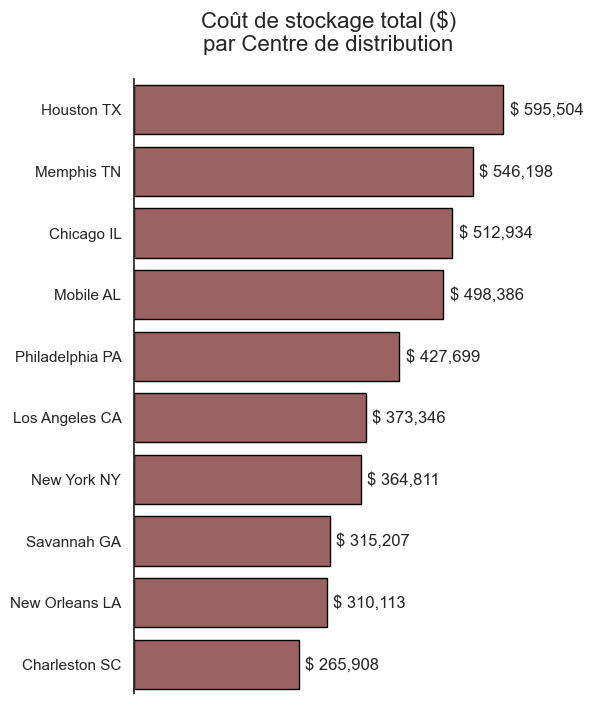

Coût total stockage des marchandises : $ 4,210,106


In [ ]:
# --- Data
data = df.groupby('distribution_center_name').agg({'inventory_cost': 'sum'}).reset_index()
data = data.sort_values(by= 'inventory_cost', ascending= False)


# --- Bars Aesthetics
color = ['#a45959']
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize=(5, 8))

ax = sns.barplot(x= 'inventory_cost',
                 y= 'distribution_center_name',
                 data= data,
                 color = color[0],
                 edgecolor= edgecolor,
                 orient= 'h',
                 legend = False
                 )


# --- Chart Aesthetics
sns.despine()

ax.spines['bottom'].set_color(None)
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks([])

# ax.spines['left'].set_color(None)
# ax.get_yaxis().set_visible(False)
# ax.yaxis.set_ticks([])


# --- Chart Labels
plt.xlabel('Coût total ($)')
plt.ylabel(None)
plt.title('Coût de stockage total ($)\npar Centre de distribution', fontsize=16, pad=20)


# --- Bars Labels
space= 10000
for i, v in enumerate(data['inventory_cost']):
    plt.text(v + space, i, f"$ {v:,.0f}", va='center')


# --- Display
plt.show()


# --- Preparation mean time
total_inventory_cost = round(data['inventory_cost'].sum(), 0)
print(f'Coût total stockage des marchandises : $ {total_inventory_cost:,.0f}')

##### 🔹 Temps moyen (h) de Préparation des commandes par Centre de distribution

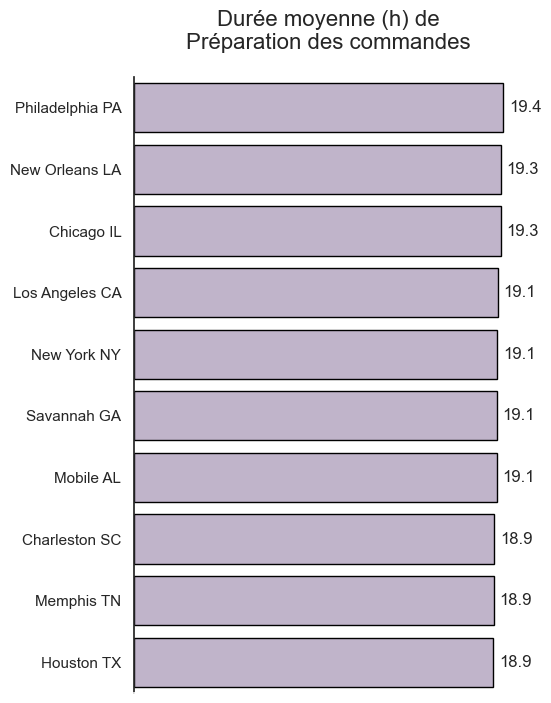

Durée moyenne de Préparation de commande : 19.0 h


In [ ]:
# --- Data
data = df.groupby('distribution_center_name').agg({'order_preparation_time': 'mean'}).reset_index()
data = data.sort_values(by= 'order_preparation_time', ascending= False).reset_index(drop= True)


# --- Bars Aesthetics
color = ['#c0b0ce']
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize=(5, 8))

ax = sns.barplot(x= 'order_preparation_time',
                 y= 'distribution_center_name',
                 data= data,
                 color = color[0],
                 edgecolor= edgecolor,
                 orient= 'h',
                 legend = False
                 )


# --- Chart Aesthetics
sns.despine()

ax.spines['bottom'].set_color(None)
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks([])

# ax.spines['left'].set_color(None)
# ax.get_yaxis().set_visible(False)
# ax.yaxis.set_ticks([])


# --- Chart Labels
plt.xlabel('Temps moyen de préparation (jours)')
plt.ylabel('Centre de distribution')
plt.ylabel(None)
plt.title('Durée moyenne (h) de\nPréparation des commandes', fontsize=16, pad=20)


# --- Bars Labels
space= 0.3
for i, v in enumerate(data['order_preparation_time']):
    plt.text(v + space, i, f"{v:.1f}", va='center')


# --- Display
plt.show()


# --- Preparation mean time
order_preparation_mean_time = round(data['order_preparation_time'].mean(), 0)
print(f'Durée moyenne de Préparation de commande : {order_preparation_mean_time} h')

##### 🔹Temps moyen (h) de Livraison des commandes par Centre de distribution

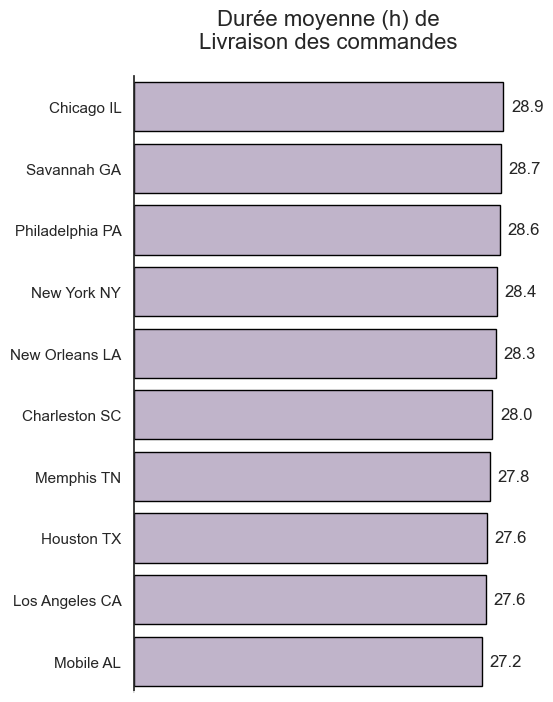

Durée moyenne de Livraison de commande : 28.0 h


In [ ]:
# --- Data
data = df.groupby('distribution_center_name').agg({'order_delivery_time': 'mean'}).reset_index()
data = data.sort_values(by= 'order_delivery_time', ascending= False).reset_index(drop= True)


# --- Bars Aesthetics
color = ['#c0b0ce']
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize=(5, 8))

ax = sns.barplot(x= 'order_delivery_time',
                 y= 'distribution_center_name',
                 data= data,
                 color= color[0],
                 edgecolor= edgecolor,
                 orient= 'h',
                 legend = False
                 )


# --- Chart Aesthetics
sns.despine()

ax.spines['bottom'].set_color(None)
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks([])

# ax.spines['left'].set_color(None)
# ax.get_yaxis().set_visible(False)
# ax.yaxis.set_ticks([])


# --- Chart Labels
plt.xlabel('Temps moyen de livraison (h)')
plt.ylabel('Centre de distribution')
plt.ylabel(None)
plt.title('Durée moyenne (h) de\nLivraison des commandes', fontsize=16, pad=20)


# --- Bars Labels
space= 0.6
for i, v in enumerate(data['order_delivery_time']):
    plt.text(v + space, i, f"{v:.1f}", va='center')


# --- Display
plt.show()


# --- Preparation mean time
order_delivery_mean_time = round(data['order_delivery_time'].mean(), 0)
print(f'Durée moyenne de Livraison de commande : {order_delivery_mean_time} h')

##### 🔹 Durée moyenne (h) d'expédition des commandes par Centre de distribution

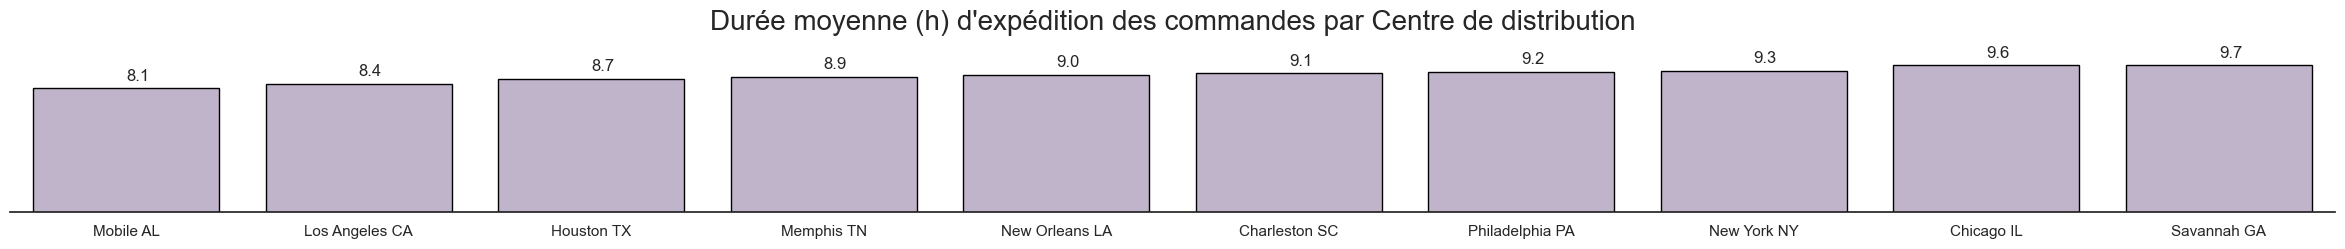

Durée moyenne d'expédition de commande : 9.0 h


In [ ]:
# --- Data
df['order_shipping_time'] = df['order_delivery_time'] - df['order_preparation_time']

data = df.groupby('distribution_center_name').agg({'order_shipping_time': 'mean'}).reset_index()
data = data.sort_values(by= 'order_shipping_time', ascending= True).reset_index(drop= True)


# --- Bars Aesthetics
color = ['#c0b0ce']
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize=(30, 2))

ax = sns.barplot(y= 'order_shipping_time',
                 x= 'distribution_center_name',
                 data= data,
                 color= color[0],
                 edgecolor= edgecolor,
                 orient= 'v',
                 legend = False
                 )


# --- Chart Aesthetics
sns.despine()

# ax.spines['bottom'].set_color(None)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.set_ticks([])

ax.spines['left'].set_color(None)
ax.get_yaxis().set_visible(False)
ax.yaxis.set_ticks([])


# --- Chart Labels
plt.xlabel(None)
plt.ylabel('Durée moyenne d\'expédition (h)')
plt.title('Durée moyenne (h) d\'expédition des commandes par Centre de distribution', fontsize=20, pad=20)


# --- Bars Labels
space= 0.8
for i, v in enumerate(data['order_shipping_time']):
    plt.text(i, v + space, f"{v:.1f}", va='center')


# --- Display
plt.show()


# --- Preparation mean time
order_shipping_mean_time = round(data['order_shipping_time'].mean(), 0)
print(f'Durée moyenne d\'expédition de commande : {order_shipping_mean_time} h')

##### 🔹 Temps moyen (h) de Préparation par Catégorie de produits

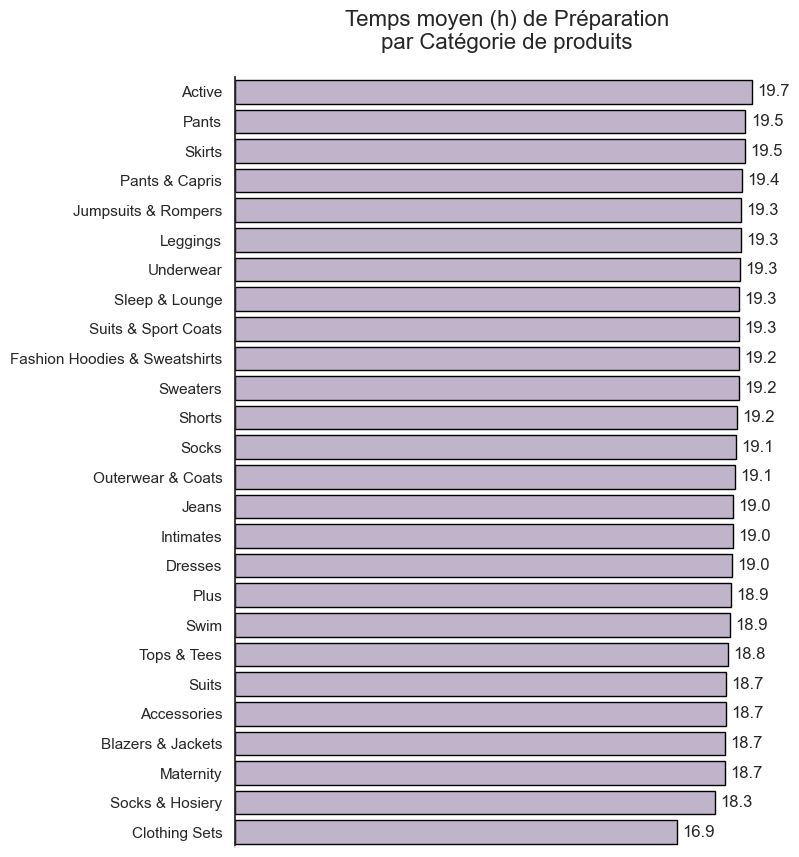

In [ ]:
# --- Data
data = df.groupby('product_category')['order_preparation_time'].mean().reset_index()
data = data.sort_values(by='order_preparation_time', ascending=False).reset_index(drop= True)


# --- Bars Aesthetics
color = ['#c0b0ce']
edgecolor = 'black'


# # --- Bars Aesthetics
# palette = sns.color_palette('RdYlGn', n_colors= len(data))
# palette =  ['#542770']
# # palette.reverse()
# edgecolor = 'black'

# --- Chart Plotting
plt.figure(figsize= (7, 10))

ax = sns.barplot(x= 'order_preparation_time',
                 y= 'product_category',
                 data= data,
                 color= color[0],
                 edgecolor= edgecolor
                 )

# --- Chart Aesthetics
sns.despine()

ax.spines['bottom'].set_color(None)
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks([])

# ax.spines['left'].set_color(None)
# ax.get_yaxis().set_visible(False)
# ax.yaxis.set_ticks([])


# --- Chart Labels
plt.xlabel('Temps de préparation moyen (jours)')
plt.ylabel(None)
plt.title('Temps moyen (h) de Préparation\npar Catégorie de produits', fontsize= 16, pad= 20)


# --- Bars Labels
space= 0.2
for i, v in enumerate(data['order_preparation_time']):
    plt.text(v + space, i, f"{v:.1f}", va='center')


# --- Display
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_8952\3447613719.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='order_delivery_time', y='distribution_center_name', data=data, palette=palette, edgecolor=edgecolor)


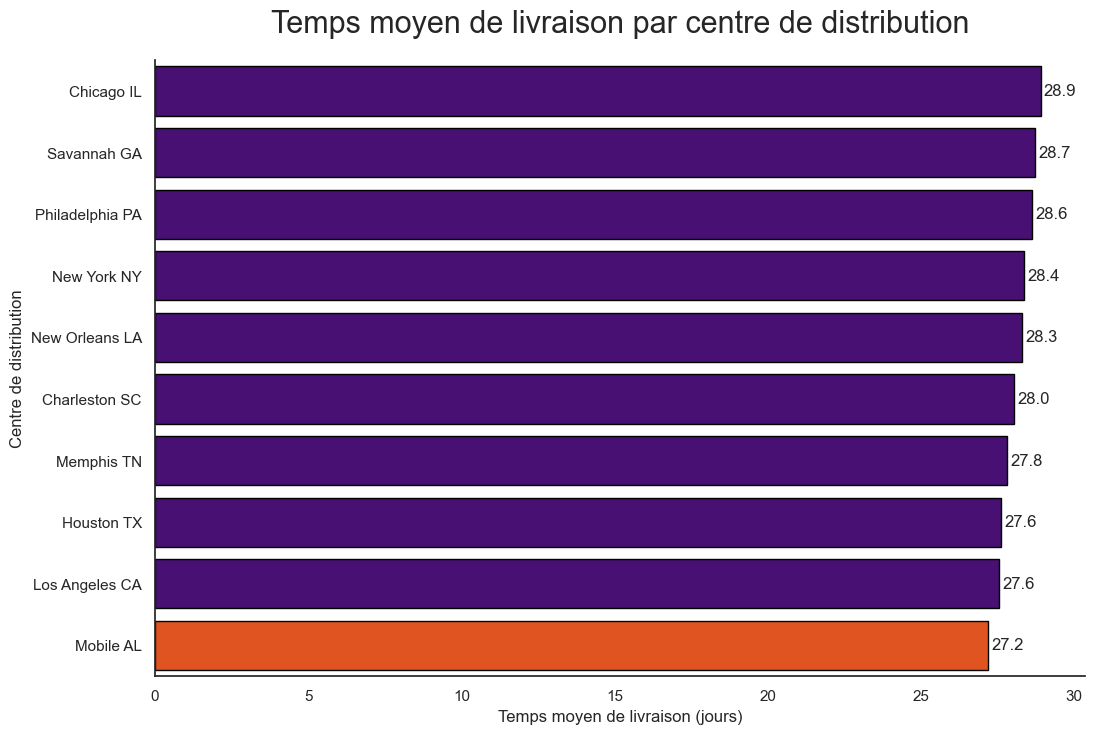

In [ ]:
# Calculer le temps moyen de livraison par centre de distribution
data = df.groupby('distribution_center_name')['order_delivery_time'].mean().reset_index()
data = data.sort_values(by='order_delivery_time', ascending=False)

# Définir la palette de couleurs
max_value = data['order_delivery_time'].min()
palette = ['#4b0082' if x != max_value else '#ff4500' for x in data['order_delivery_time']]
edgecolor = 'black'

# Créer le graphique
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='order_delivery_time', y='distribution_center_name', data=data, palette=palette, edgecolor=edgecolor)

# Ajouter des labels
plt.xlabel('Temps moyen de livraison (jours)')
plt.ylabel('Centre de distribution')
plt.title('Temps moyen de livraison par centre de distribution', fontsize=22, pad=20)
sns.despine()

for i, v in enumerate(data['order_delivery_time']):
    plt.text(v + 0.1, i, f"{v:.1f}", va='center')

plt.show()

#### ◻ Analyse du parcours client

##### 🔹 Total des Profits par Genre

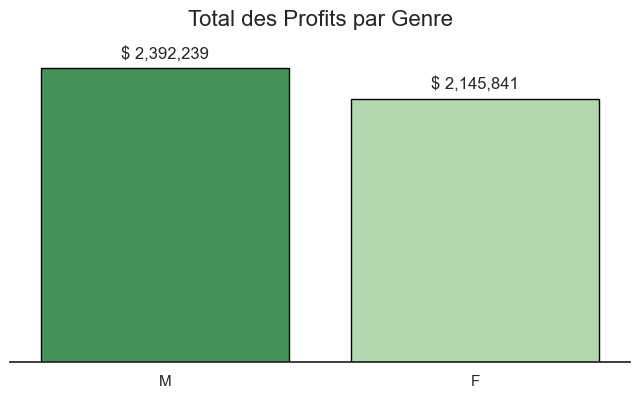

In [ ]:
# Data
data = df.groupby('user_gender')['profit'].sum().reset_index()
data = data.sort_values(by= 'profit', ascending= False)


# --- Bars Aesthetics
palette = sns.color_palette('Greens', n_colors= len(data.index))
# palette.reverse()
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize= (8, 4))

ax = sns.barplot(x= 'user_gender',
                 y= 'profit',
                 data= data,
                 palette= palette,
                 hue= 'profit',
                 edgecolor= edgecolor,
                 orient= 'v',
                 legend= False
                )


# --- Chart Aesthetics
sns.despine()

# ax.spines['bottom'].set_color(None)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.set_ticks([])

ax.spines['left'].set_color(None)
ax.get_yaxis().set_visible(False)
ax.yaxis.set_ticks([])


# --- Chart Labels
plt.xlabel(None)
plt.ylabel('Profit ($)')
plt.title('Total des Profits par Genre', fontsize=16, pad=20)


# --- Bars Labels
space= 80000
for i, v in enumerate(data['profit']):
    plt.text(i, v + space, f"$ {v:,.0f}", ha='center')


# --- Display
plt.show()

##### 🔹 Navigateurs web utilisés

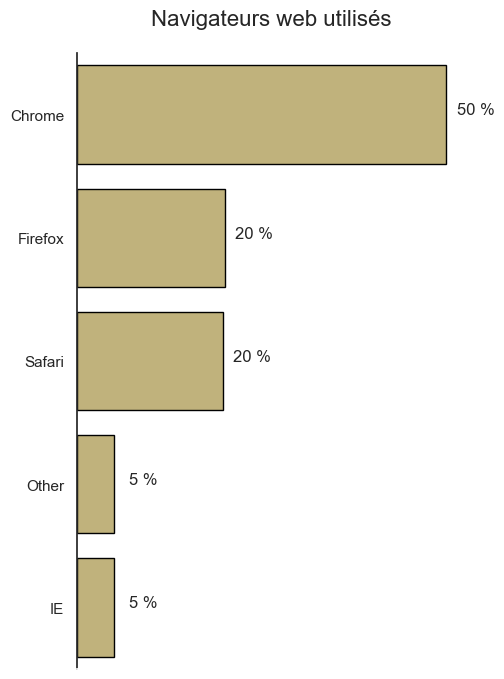

In [ ]:
# --- Data
data = df2['event_browser'].value_counts(normalize=True).sort_values(ascending=False)


# --- Bars Aesthetics
color = ['#cbb871']
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize=(5, 8))

ax= sns.barplot(x= data.values, 
                y= data.index,
                color= color[0],
                edgecolor= edgecolor,
                legend= False
                )


# --- Chart Aesthetics
sns.despine()

ax.spines['bottom'].set_color(None)
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks([])

# ax.spines['left'].set_color(None)
# ax.get_yaxis().set_visible(False)
# ax.yaxis.set_ticks([])

ax.xaxis.set_tick_params(labelsize = 13)


# --- Chart Labels
plt.xlabel(None)
plt.ylabel(None)
plt.title('Navigateurs web utilisés', fontsize=16, pad=20)


# --- Bars Labels
space= 0.04
for i, v in enumerate(data.values):
    plt.text(v + space, i, f"{v * 100:.0f} %", ha='center')


# --- Display
plt.show()

##### 🔹 Utilisateurs par Source de traffic

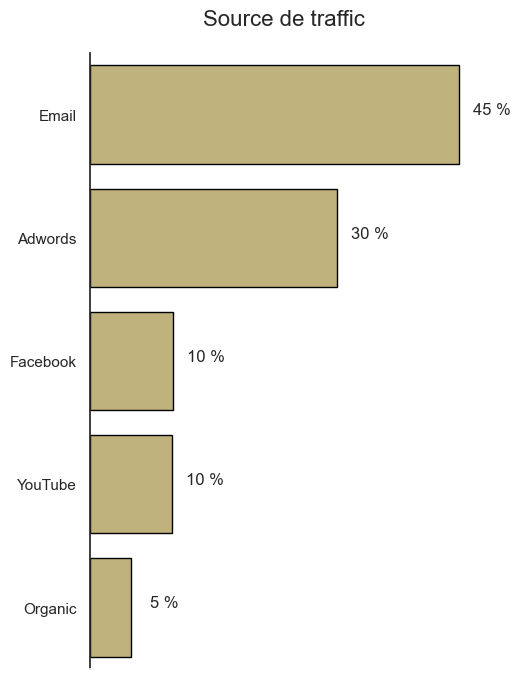

In [ ]:
# --- Data
data = df2['event_traffic_source'].value_counts(normalize=True).sort_values(ascending=False)


# --- Bars Aesthetics
color = ['#cbb871']
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize=(5, 8))

ax= sns.barplot(x= data.values, 
                y= data.index,
                color= color[0],
                edgecolor= edgecolor,
                legend= False
                )


# --- Chart Aesthetics
sns.despine()

ax.spines['bottom'].set_color(None)
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks([])

# ax.spines['left'].set_color(None)
# ax.get_yaxis().set_visible(False)
# ax.yaxis.set_ticks([])

ax.xaxis.set_tick_params(labelsize = 13)


# --- Chart Labels
plt.xlabel(None)
plt.ylabel(None)
plt.title('Source de traffic', fontsize=16, pad=20)


# --- Bars Labels
space= 0.04
for i, v in enumerate(data.values):
    plt.text(v + space, i, f"{v * 100:.0f} %", ha='center')


# --- Display
plt.show()

##### 🔹 Activité des utilisateurs sur les pages du site

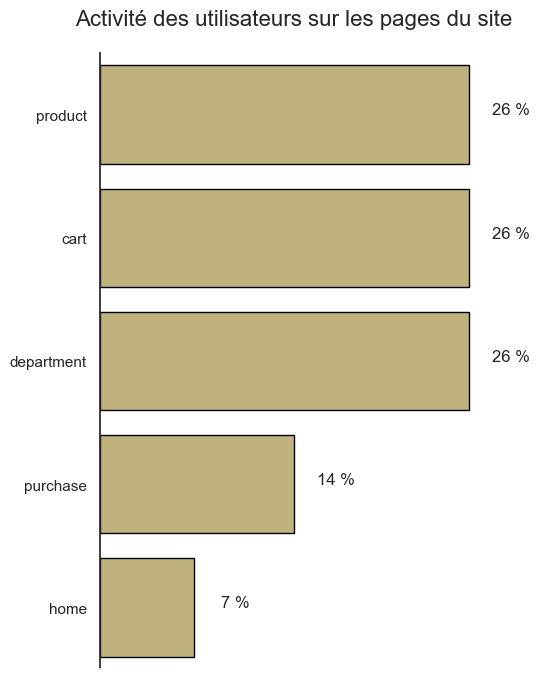

In [ ]:
# --- Data
data = df2['event_type'].value_counts(normalize=True).sort_values(ascending=False)


# --- Bars Aesthetics
color = ['#cbb871']
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize=(5, 8))

ax= sns.barplot(x= data.values, 
                y= data.index,
                color= color[0],
                edgecolor= edgecolor,
                legend= False
                )


# --- Chart Aesthetics
sns.despine()

ax.spines['bottom'].set_color(None)
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks([])

# ax.spines['left'].set_color(None)
# ax.get_yaxis().set_visible(False)
# ax.yaxis.set_ticks([])

ax.xaxis.set_tick_params(labelsize = 13)


# --- Chart Labels
plt.xlabel(None)
plt.ylabel(None)
plt.title('Activité des utilisateurs sur les pages du site', fontsize=16, pad=20)


# --- Bars Labels
space= 0.03
for i, v in enumerate(data.values):
    plt.text(v + space, i, f"{v * 100:.0f} %", ha='center')


# --- Display
plt.show()



##### 🔹 Répartition des Commande par Statut

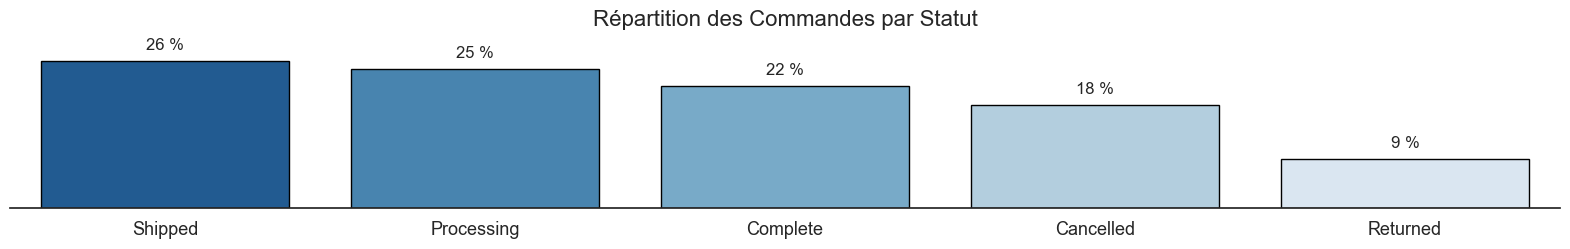

In [ ]:
# --- Data
data = df['order_status'].value_counts(normalize= True) * 100


# --- Bars Aesthetics
palette = sns.color_palette('Blues', n_colors= len(data.index))
# palette.reverse()
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize=(20, 2))

ax = sns.barplot(x= data.index,
                 y= data.values,
                 palette= palette,
                 hue= data.values,
                 edgecolor= edgecolor,
                 legend= False
                )


# --- Chart Aesthetics
sns.despine()

# ax.spines['bottom'].set_color(None)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.set_ticks([])

ax.spines['left'].set_color(None)
ax.get_yaxis().set_visible(False)
ax.yaxis.set_ticks([])

ax.xaxis.set_tick_params(labelsize = 13)


# --- Chart Labels
plt.xlabel(None)
plt.ylabel(None)
plt.title('Répartition des Commandes par Statut', fontsize= 16, pad= 20)
sns.despine()


# --- Bars Labels
space= 2
for i, v in enumerate(data.values):
    plt.text(i, v + space, f"{v:.0f} %", ha='center')


# --- Display
plt.show()


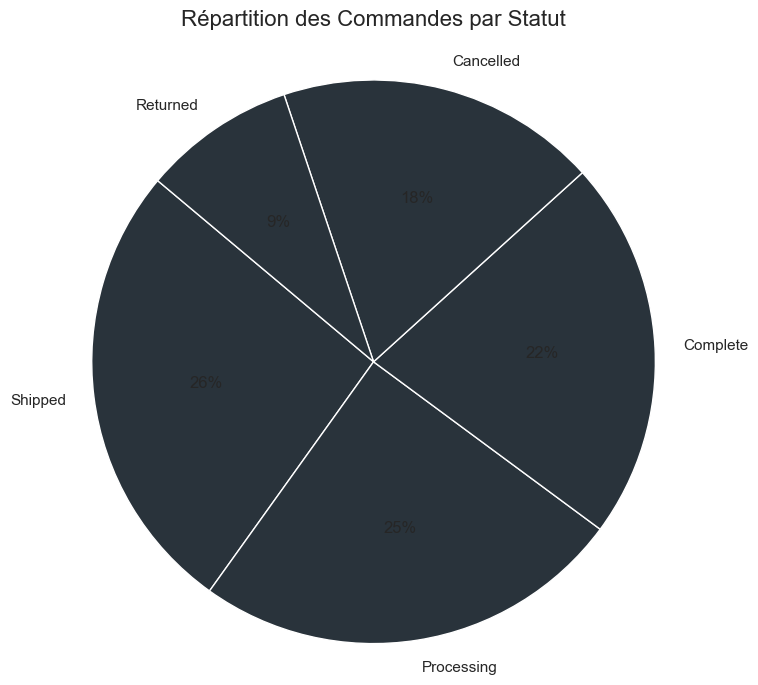

In [ ]:
# --- Data
data = df['order_status'].value_counts(normalize=True) * 100

# --- Chart Plotting
plt.figure(figsize=(8, 8))
ax = plt.pie(data,
             labels=data.index,
             autopct= '%1.0f%%',
             startangle= 140,
             colors= palette
            )

plt.title('Répartition des Commandes par Statut', fontsize= 16, pad= 20)

# --- Display
plt.axis('equal')
plt.show()